In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set(font="IPAexGothic",style="white")

In [17]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample = pd.read_csv("./sample.csv",header=None)
print("Data Shapes")
print("Train:",train.shape, "Test:",test.shape, "Sample:",sample.shape)

Data Shapes
Train: (207, 12) Test: (40, 11) Sample: (40, 2)


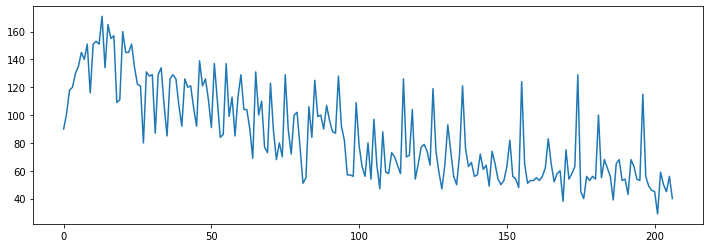

In [18]:
plt.figure(figsize=(12,4))
plt.plot(train['y'])

In [19]:
train = train[25:].reset_index(drop=True)

C:\Users\user\AppData\Local\Temp\ipykernel_6756\3031331256.py:8: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


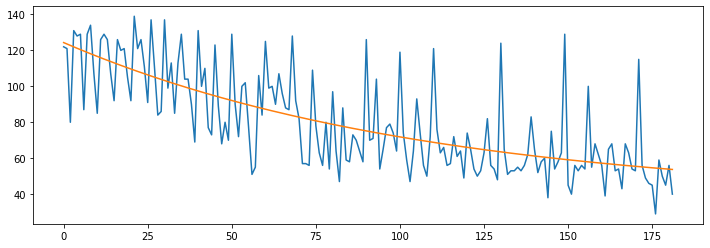

In [20]:
#トレンド
# https://qiita.com/chusan/items/d7b210243f3b646375ba
# https://qiita.com/maskot1977/items/e4f5f71200180865986e
# http://www.yamamo10.jp/yamamoto/comp/Python/library/SciPy/fit/index.php
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xs = train.index.values
ys = train['y'].values

popt, pcov = curve_fit(func, xs, ys)

a1, b1, c1 = popt
y_reg = a1 * np.exp(-b1 * xs) + c1

plt.figure(figsize=(12,4))
plt.plot(train['y'])
plt.plot(y_reg)

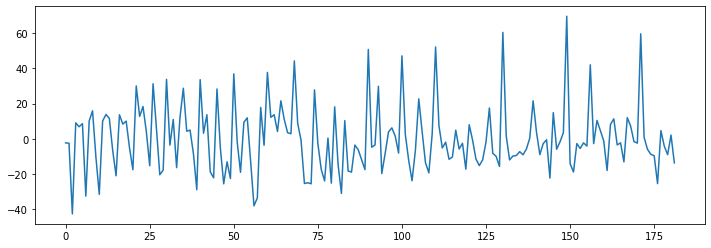

In [25]:
new_y = train['y'] - y_reg
new_y = pd.DataFrame({'new_y': new_y})

plt.figure(figsize=(12,4))
plt.plot(new_y)

In [27]:
"""
欠損値確認
"""
train.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              16
remarks          161
event            169
payday           173
weather            0
precipitation      0
temperature        0
dtype: int64

In [26]:
"""
欠損値確認
"""
test.isnull().sum()

datetime          0
week              0
soldout           0
name              0
kcal              4
remarks          33
event            37
payday           38
weather           0
precipitation     0
temperature       0
dtype: int64

In [34]:
train_ = train.copy().drop('y', axis=1)

In [37]:
data_df = pd.concat([train_, test],axis=0)

In [38]:
"""
datetimeに欠損値がない為、indexにする
"""
data_df.index = pd.to_datetime(data_df["datetime"])
data_df

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-12-24,2013-12-24,火,0,さっくりメンチカツ,NaN,NaN,NaN,NaN,快晴,--,11.5
2013-12-25,2013-12-25,水,1,手ごね風ハンバーグ,NaN,NaN,NaN,NaN,快晴,--,8.0
2013-12-26,2013-12-26,木,0,酢豚,NaN,NaN,NaN,NaN,曇,--,7.3
2014-01-07,2014-1-7,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,NaN,快晴,--,7.3
2014-01-08,2014-1-8,水,0,豚肉の生姜焼,462.0,NaN,NaN,NaN,曇,--,9.8
...,...,...,...,...,...,...,...,...,...,...,...
2014-11-21,2014-11-21,金,0,ロコモコ丼,NaN,お楽しみメニュー,NaN,NaN,快晴,--,14.9
2014-11-25,2014-11-25,火,1,なすと挽肉のはさみ揚げ,460.0,NaN,NaN,NaN,雨,1.5,11.4
2014-11-26,2014-11-26,水,1,鶏肉の治部煮風,415.0,NaN,NaN,NaN,雨,1,9.2


In [ ]:
# https://happy-analysis.com/python/python-topic-seasonality.html

In [ ]:
import statsmodels.api as sm

In [ ]:
# https://qiita.com/shimopino/items/4ef78aa589e43f315113
# https://github.com/gautham20/pytorch-ts/blob/master/item%20sales%20forecasting.ipynb

In [41]:
# https://qiita.com/shimopino/items/4ef78aa589e43f315113
# https://github.com/gautham20/pytorch-ts/blob/master/item%20sales%20forecasting.ipynb

"""
月・日・曜日の特徴作成
"""
data_df['month'] = data_df.index.month
data_df['day']   = data_df.index.day
data_df['dow']   = data_df.index.dayofweek

"""
月・日・曜日をsin_cosに変換した特徴作成
"""
# https://www.delftstack.com/ja/howto/matplotlib/how-to-make-a-square-plot-with-equal-axes-in-matplotlib/
def sin_cos_transform(df, col):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / len(set(df[col])))
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / len(set(df[col])))
    return df

data_df = sin_cos_transform(data_df, 'month')
data_df = sin_cos_transform(data_df, 'day')
data_df = sin_cos_transform(data_df, 'dow')

In [42]:
"""
元に戻す
"""
data_df = data_df.drop('datetime', axis=1)
data_df = data_df.reset_index()

In [44]:
"""
paydayの確認
"""
data_df['payday'].value_counts()

1.0    11
Name: payday, dtype: int64

In [45]:
"""
paydayの欠損値に給料日が含まれているか確認
"""

data_df[(data_df['payday'].isnull()) & (data_df['day']==10)].index

Int64Index([], dtype='int64')

In [46]:
"""
paydayの欠損値を0で埋める
"""
data_df = data_df.fillna({'payday':0})

In [47]:
data_df['payday'].value_counts()

0.0    211
1.0     11
Name: payday, dtype: int64

In [48]:
"""
eventの確認
"""
data_df['event'].value_counts()

ママの会             9
キャリアアップ支援セミナー    7
Name: event, dtype: int64

In [49]:
"""
evantフラグ作成
"""
data_df = data_df.fillna({'event':'0'})

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data_df['event'])
event_label_array = le.transform(data_df['event'])
event_label = pd.Series(event_label_array, name='event_label')

In [65]:
train['remarks'].value_counts()

お楽しみメニュー                    12
料理長のこだわりメニュー                 5
鶏のレモンペッパー焼（50食）、カレー（42食）     1
酢豚（28食）、カレー（85食）             1
手作りの味                        1
スペシャルメニュー（800円）              1
Name: remarks, dtype: int64

In [66]:
test['remarks'].value_counts()

お楽しみメニュー          4
料理長のこだわりメニュー      2
近隣に飲食店複合ビルオープン    1
Name: remarks, dtype: int64

In [51]:
"""
remarksの確認
"""
data_df['remarks'].value_counts()

お楽しみメニュー                    16
料理長のこだわりメニュー                 7
鶏のレモンペッパー焼（50食）、カレー（42食）     1
酢豚（28食）、カレー（85食）             1
手作りの味                        1
スペシャルメニュー（800円）              1
近隣に飲食店複合ビルオープン               1
Name: remarks, dtype: int64

In [52]:
"""
remarksの欠損値を0で埋める
"""

data_df = data_df.fillna({'remarks':'0'})

In [53]:
le = LabelEncoder()
le.fit(data_df['remarks'])
remarks_label_array = le.transform(data_df['remarks'])
remarks_label = pd.Series(remarks_label_array, name='remarks_label')

In [54]:
remarks_label.value_counts()

0    194
1     16
4      7
7      1
6      1
3      1
2      1
5      1
Name: remarks_label, dtype: int64

In [60]:
"""
kcalの欠損値を平均で埋める
"""
data_df = data_df.fillna({'kcal':data_df['kcal'].mean()})

407.3811881188119

In [62]:
train['weather'].value_counts()

晴れ    48
曇     46
快晴    39
薄曇    24
雨     23
雪      1
雷電     1
Name: weather, dtype: int64

In [63]:
test['weather'].value_counts()

快晴    12
曇      9
雨      8
晴れ     7
薄曇     4
Name: weather, dtype: int64

<Figure size 864x288 with 0 Axes>

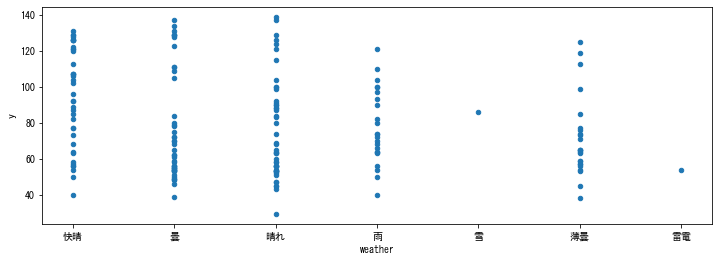

In [92]:
import matplotlib
plt.figure(figsize=(12,4))
font = {'family':'Ms Gothic'}
matplotlib.rc('font', **font)
train.plot.scatter('weather', 'y', figsize=(12,4))
plt.show()

In [64]:
"""
weather
testにだけ存在する要素がない為、一括で変換
"""
le = LabelEncoder()
le.fit(data_df['weather'])
weather_label_array = le.transform(data_df['weather'])
weather_label = pd.Series(weather_label_array, name='weather_label')

In [69]:
for i in range(len(data_df['weather'])):
    if '晴' in data_df['weather'][i] or '曇' in data_df['weather'][i]:
        
    data_df['weather'][i]
    break
i

0

In [72]:
'晴' in data_df['weather'][i]

True

In [70]:
data_df['weather'][0]

'快晴'

In [58]:
data_df[:len(train)]

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,dow,month_sin,month_cos,day_sin,day_cos,dow_sin,dow_cos
0,2013-12-24,火,0,さっくりメンチカツ,NaN,0,0,0.0,快晴,--,11.5,12,24,1,-2.449294e-16,1.000000e+00,-0.988468,0.151428,0.951057,0.309017
1,2013-12-25,水,1,手ごね風ハンバーグ,NaN,0,0,0.0,快晴,--,8.0,12,25,2,-2.449294e-16,1.000000e+00,-0.937752,0.347305,0.587785,-0.809017
2,2013-12-26,木,0,酢豚,NaN,0,0,0.0,曇,--,7.3,12,26,3,-2.449294e-16,1.000000e+00,-0.848644,0.528964,-0.587785,-0.809017
3,2014-01-07,火,0,カレー入りソーセージカツ,404.0,0,0,0.0,快晴,--,7.3,1,7,1,5.000000e-01,8.660254e-01,0.988468,0.151428,0.951057,0.309017
4,2014-01-08,水,0,豚肉の生姜焼,462.0,0,0,0.0,曇,--,9.8,1,8,2,5.000000e-01,8.660254e-01,0.998717,-0.050649,0.587785,-0.809017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2014-09-24,水,1,白身魚のマスタード焼き,408.0,0,0,0.0,曇,0,24.8,9,24,2,-1.000000e+00,-1.836970e-16,-0.988468,0.151428,0.587785,-0.809017
178,2014-09-25,木,0,牛カルビ焼き肉,394.0,0,0,0.0,曇,0,25.4,9,25,3,-1.000000e+00,-1.836970e-16,-0.937752,0.347305,-0.587785,-0.809017
179,2014-09-26,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,0.0,晴れ,--,27.1,9,26,4,-1.000000e+00,-1.836970e-16,-0.848644,0.528964,-0.951057,0.309017
180,2014-09-29,月,1,豚肉と玉子の炒め,404.0,0,0,0.0,快晴,--,26.6,9,29,0,-1.000000e+00,-1.836970e-16,-0.394356,0.918958,0.000000,1.000000


In [ ]:
# https://qiita.com/chusan/items/d7b210243f3b646375ba